<a href="https://colab.research.google.com/github/sanskriti49/spam-detection/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
# importing libraries
import numpy as py
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importing Dataset

In [270]:
url="https://raw.githubusercontent.com/sanskriti49/spam-detection/main/spam.csv"
df=pd.read_csv(url, encoding="ISO-8859-1")
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


## Label Encoding

In [271]:
df = df[['v1', 'v2']]
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# encode the labels: 'ham' means 0 , 'spam' means 1
df['label']=df['label'].map({'ham':0, 'spam':1})

x=df['message']
y=df['label']

y = y.fillna(y.median())
y = pd.to_numeric(y,errors='coerce')



## Data Pre-processing

In [272]:
ps=PorterStemmer()
corpus=[]

for i in range(0,len(x)):
  email=re.sub('[^a-zA-Z]',' ',str(x.iloc[i]))
  email=email.lower()
  email=email.split(' ')

  email=[ps.stem(word) for word in email if word not in stopwords.words('english')]
  email=' '.join(email)
  corpus.append(email)



## Data transformation

In [273]:
# CountVectorizer matrix
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=5000)
# x=cv.fit_transform(corpus).toarray()

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english',max_features=5000)
x_tfidf = tfidf.fit_transform(corpus).toarray()

## Train-Test split

In [274]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_tfidf,y,test_size=0.25,random_state=0)


In [275]:
# applying MultiNomialNB model
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB().fit(x_train, y_train)

## Making predictions and creating a Confusion Matrix

In [276]:
y_pred=classifier.predict(x_test)

# creating confusion matrix
# from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)

[[1195    1]
 [  45  152]]


## Getting the accuracy

In [277]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy score of MultinomialNB is: ", accuracy)

# Calculate precision score
precision = precision_score(y_test, y_pred)
print(f"Precision score of MultinomialNB is: {precision}")

Accuracy score of MultinomialNB is:  0.9669777458722182
Precision score of MultinomialNB is: 0.9934640522875817


## Dumping Models

In [280]:
import pickle
from google.colab import files

pickle.dump(classifier,open('model.pkl','wb'))
pickle.dump(tfidf,open('tfidf-vectorizer.pkl','wb'))

files.download('model.pkl')
files.download('tfidf-vectorizer.pkl')

final_df = pd.DataFrame({'Subject': df['message'], 'Label': y})
final_df['Label'] = final_df['Label'].map({0: "Not spam", 1: "Spam"})

print(final_df.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                             Subject     Label
0  Go until jurong point, crazy.. Available only ...  Not spam
1                      Ok lar... Joking wif u oni...  Not spam
2  Free entry in 2 a wkly comp to win FA Cup fina...      Spam
3  U dun say so early hor... U c already then say...  Not spam
4  Nah I don't think he goes to usf, he lives aro...  Not spam


## Pie-chart

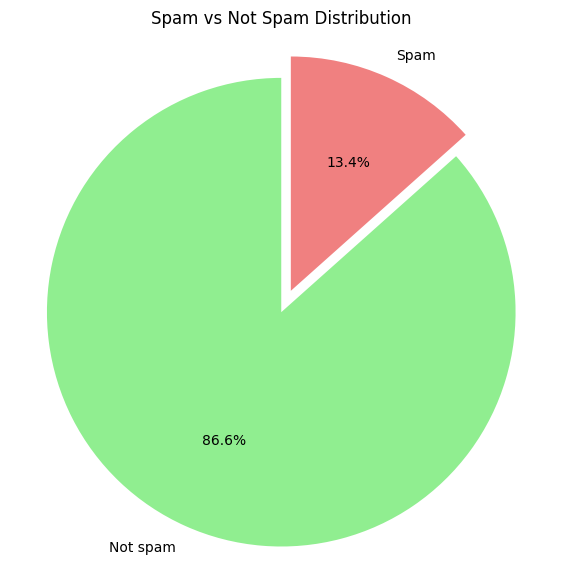

In [279]:
# Count the occurrences of each label
label_counts = final_df['Label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, explode=(0.1, 0))
plt.title('Spam vs Not Spam Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()
